# HToMuMu Feature Exploration
Let's look at our different feature variables to see which might be helpful discriminators. We can also verify that the cuts we're using for our categories are reasonable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in all signal and background MC in our signal region (120 to 130 GeV)
I exported the signal and background events in 110 to 160 GeV to a csv file. When an event is outside the signal region then bin < 0. if the event is inside the signal region bin is >=0.

In [2]:
df = pd.read_csv('data/all_sig_and_bkg_in_110_to_160_GeV.csv')
df = df[df.bin >= 0] # only look at those in signal region

## Extract the signal and background into different datasets

In [3]:
bkgdf = df[df.is_signal <= 0]
sigdf = df[df.is_signal > 0]
bkgdf.describe()

,Unnamed: 0,MET,N_valid_bjets,N_valid_electrons,N_valid_extra_leptons,N_valid_extra_muons,N_valid_jets,bin,bjet0_eta,bjet0_pt,...,m_jj,mu0_eta,mu0_pt,mu1_eta,mu1_pt,mu_res_eta,phi_star,weight,zep0,zep1
count,170528.000000,170528.000000,170528.000000,170528.000000,170528.000000,170528.000000,170528.000000,170528.000000,170528.000000,170528.000000,...,170528.000000,170528.000000,170528.000000,170528.000000,170528.000000,170528.000000,1.705280e+05,170528.000000,170528.000000,170528.000000
mean,55553.572147,118.089637,0.523767,0.028265,0.275738,0.247473,2.244916,9.056876,-588.612210,-551.058707,...,-183.531607,0.003653,85.267444,-0.000705,42.157732,1.016096,1.439776e+01,0.669625,-371.801069,-371.801554
std,53985.966617,88.127423,0.696950,0.181633,0.525101,0.503807,1.687340,5.757365,491.492647,537.751228,...,672.150106,1.189115,41.835797,1.226064,17.117332,0.443339,5.441189e+03,3.184721,482.903306,482.902933
min,0.000000,0.078131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,...,-999.000000,-2.399890,26.004500,-2.399940,10.000200,0.003638,3.946690e-06,-13.150000,-999.000000,-999.000000
25%,15806.750000,59.199950,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-999.000000,-999.000000,...,-999.000000,-0.916532,61.233350,-0.969976,30.434850,0.692356,1.522625e-01,0.000466,-999.000000,-999.000000
50%,35588.000000,101.063500,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,-999.000000,-999.000000,...,109.060000,0.001505,75.412300,-0.002044,41.480350,1.006950,3.600395e-01,0.007249,-0.897418,-0.895747
75%,76667.500000,155.003250,1.000000,0.000000,0.000000,0.000000,3.000000,14.000000,-0.323677,65.668825,...,254.044500,0.924597,98.056575,0.967992,52.289975,1.311090,7.005250e-01,0.375002,0.267005,0.268890
max,219345.000000,7732.100000,4.000000,3.000000,3.000000,3.000000,14.000000,19.000000,2.399290,1106.150000,...,5704.850000,2.399880,876.973000,2.399930,512.839000,2.394720,2.246930e+06,13.161300,4.651930,4.264580


## List the available features
if you were curious which ones were saved then here ya go

In [4]:
bkgdf.columns

Index([u'Unnamed: 0', u'MET', u'N_valid_bjets', u'N_valid_electrons',
       u'N_valid_extra_leptons', u'N_valid_extra_muons', u'N_valid_jets',
       u'bin', u'bjet0_eta', u'bjet0_pt', u'bjet1_eta', u'bjet1_pt',
       u'dEta_bb', u'dEta_jj', u'dEta_jj_mumu', u'dPhi_jj_mumu', u'dimu_pt',
       u'electron0_eta', u'electron0_pt', u'electron1_eta', u'electron1_pt',
       u'extra_muon0_eta', u'extra_muon0_pt', u'extra_muon1_eta',
       u'extra_muon1_pt', u'is_signal', u'jet0_eta', u'jet0_pt', u'jet1_eta',
       u'jet1_pt', u'mT_b_MET', u'm_bb', u'm_jj', u'mu0_eta', u'mu0_pt',
       u'mu1_eta', u'mu1_pt', u'mu_res_eta', u'phi_star', u'weight', u'zep0',
       u'zep1'],
      dtype='object')

# Make The Plots!! [Signal = Green, Background = Blue]
Let's look at the differences in the signal and background distributions for the different features. If the signal and background distributions are different then we have some discriminating power.
## MET

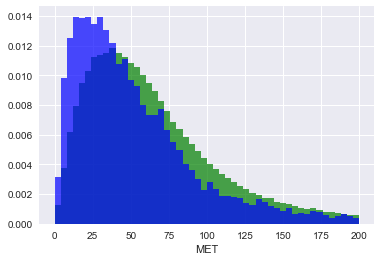

In [5]:
%matplotlib inline
sns.distplot(sigdf.MET, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'weights': sigdf.weight, 'alpha': 0.7, 'range': (0,200)})
sns.distplot(bkgdf.MET, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'weights': bkgdf.weight, 'alpha': 0.7, 'range': (0,200)})

## Muon Info
mu0 is leading mu1 is subleading

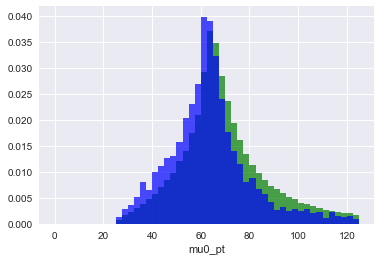

In [6]:
sns.distplot(sigdf.mu0_pt, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'range': (0,125), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.mu0_pt, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'range': (0,125), 'weights': bkgdf.weight, 'alpha': 0.7})

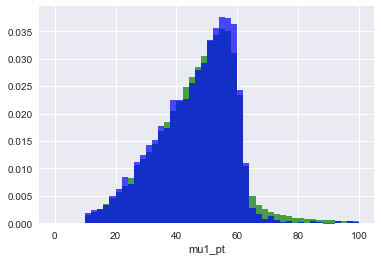

In [7]:
sns.distplot(sigdf.mu1_pt, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'range': (0, 100), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.mu1_pt, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'range': (0,100), 'weights': bkgdf.weight, 'alpha': 0.7})

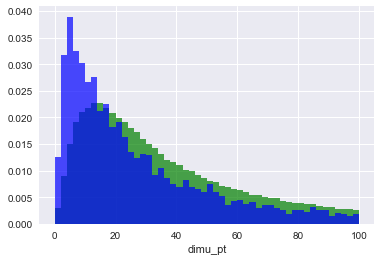

In [8]:
sns.distplot(sigdf.dimu_pt, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'range': (0, 100), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dimu_pt, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'range': (0,100), 'weights': bkgdf.weight, 'alpha': 0.7})

## Jet Info

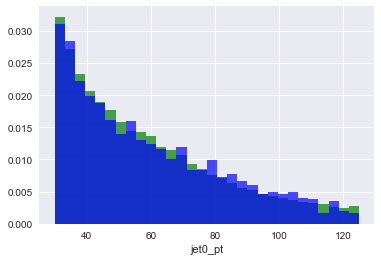

In [9]:
sns.distplot(sigdf.jet0_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (30,125),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.jet0_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (30,125),'weights': bkgdf.weight, 'alpha': 0.7})

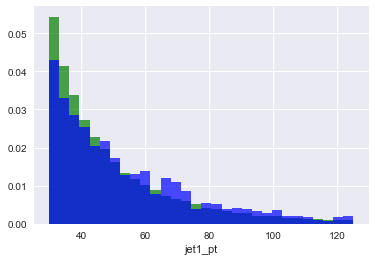

In [10]:
sns.distplot(sigdf.jet1_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (30,125), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.jet1_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (30,125), 'weights': bkgdf.weight, 'alpha': 0.7})

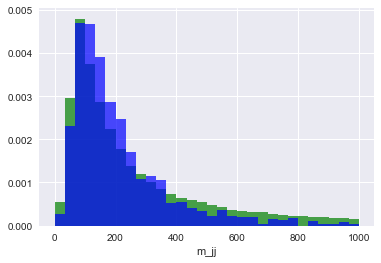

In [11]:
sns.distplot(sigdf.m_jj, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (0,1000),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.m_jj, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (0,1000),'weights': bkgdf.weight, 'alpha': 0.7})

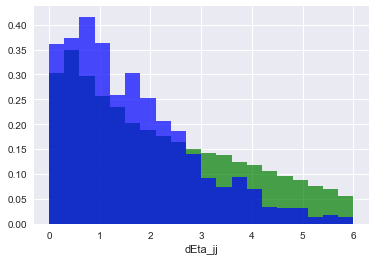

In [12]:
sns.distplot(sigdf.dEta_jj, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,6),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dEta_jj, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,6),'weights': bkgdf.weight, 'alpha': 0.7})

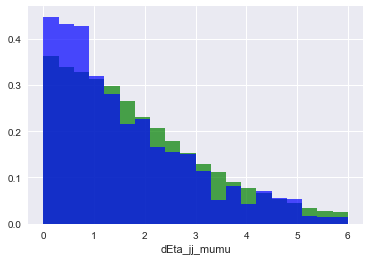

In [13]:
sns.distplot(sigdf.dEta_jj_mumu, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,6),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dEta_jj_mumu, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,6),'weights': bkgdf.weight, 'alpha': 0.7})

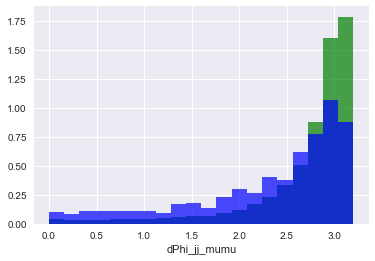

In [14]:
# accidentally saved dEta_jj_mumu values for dPhi_jj_mumu which is why this plot is the same as the above dEta_jj_mumu
sns.distplot(sigdf.dPhi_jj_mumu, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,3.2),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dPhi_jj_mumu, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,3.2),'weights': bkgdf.weight, 'alpha': 0.7})

## B-Jet Info

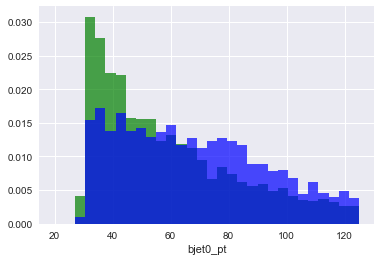

In [15]:
sns.distplot(sigdf.bjet0_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (20,125),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.bjet0_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (20,125),'weights': bkgdf.weight, 'alpha': 0.7})

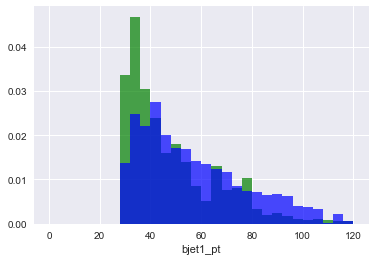

In [16]:
sns.distplot(sigdf.bjet1_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (0,120),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.bjet1_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (0,120),'weights': bkgdf.weight, 'alpha': 0.7})

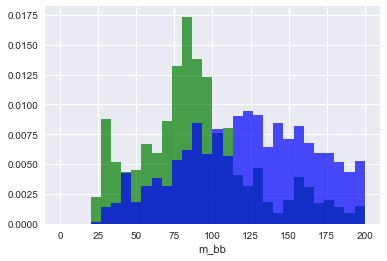

In [17]:
sns.distplot(sigdf.m_bb, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (0,200),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.m_bb, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (0,200),'weights': bkgdf.weight, 'alpha': 0.7})

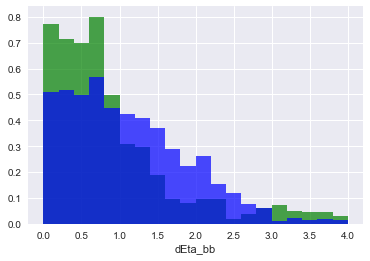

In [18]:
sns.distplot(sigdf.dEta_bb, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,4),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dEta_bb, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,4),'weights': bkgdf.weight, 'alpha': 0.7})

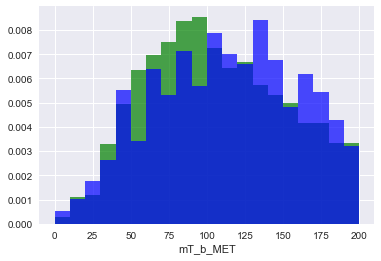

In [19]:
sigdf.columns
sns.distplot(sigdf.mT_b_MET, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,200),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.mT_b_MET, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,200),'weights': bkgdf.weight, 'alpha': 0.7})

## Phi Star
Characterizes the angle between the muons in the parent's rest frame.

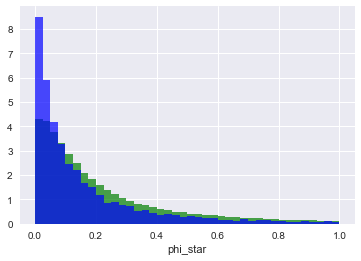

In [20]:
sns.distplot(sigdf.phi_star, kde=False, norm_hist=True, bins=40, color='green', hist_kws={'range': (0,1),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.phi_star, kde=False, norm_hist=True, bins=40, color='blue', hist_kws={'range': (0,1),'weights': bkgdf.weight, 'alpha': 0.7})

## Object Counts

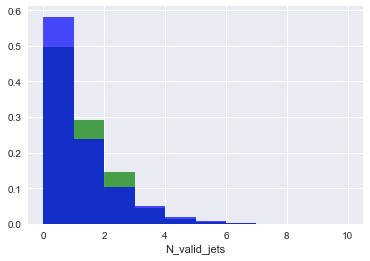

In [21]:
sns.distplot(sigdf.N_valid_jets, kde=False, norm_hist=True, bins=10, color='green', hist_kws={'range': (0,10),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.N_valid_jets, kde=False, norm_hist=True, bins=10, color='blue', hist_kws={'range': (0,10),'weights': bkgdf.weight, 'alpha': 0.7})

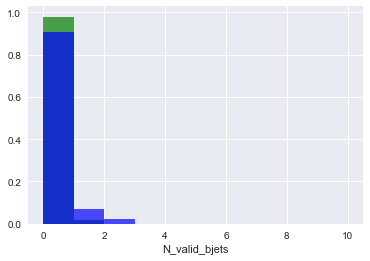

In [22]:
sns.distplot(sigdf.N_valid_bjets, kde=False, norm_hist=True, bins=10, color='green', hist_kws={'range': (0,10),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.N_valid_bjets, kde=False, norm_hist=True, bins=10, color='blue', hist_kws={'range': (0,10),'weights': bkgdf.weight, 'alpha': 0.7})

## 2D Plots

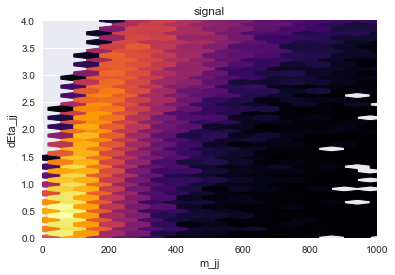

In [23]:
sigdfj = sigdf[sigdf.N_valid_jets > 1]
bkgdfj = bkgdf[bkgdf.N_valid_jets > 1]
plt.xlim(0,1000)
plt.ylim(0,4)
plt.xlabel('m_jj')
plt.ylabel('dEta_jj')
plt.title('signal')
plt.hexbin(sigdfj.m_jj, sigdfj.dEta_jj, gridsize=100, bins='log', C=sigdfj.weight.apply(lambda x: x*1e2), reduce_C_function=np.sum, cmap='inferno')

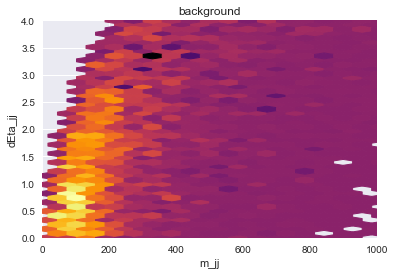

In [24]:
plt.xlim(0,1000)
plt.ylim(0,4)
plt.title('background')
plt.xlabel('m_jj')
plt.ylabel('dEta_jj')
ax = plt.hexbin(bkgdfj.m_jj, bkgdfj.dEta_jj, gridsize=100, bins='log', C=bkgdfj.weight.apply(lambda x: x*1e-2), reduce_C_function=np.sum, cmap='inferno')